In [1]:
import tensorflow as tf
import keras
import pandas as pd
import sklearn
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('cover_data.csv')

features = data_set.iloc[:,0:-1]
labels = data_set.iloc[:,-1]
col = data_set.iloc[:,0:9]

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=40, stratify=labels)

In [3]:
ct = ColumnTransformer([("scale", StandardScaler(), col.columns)])
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

In [4]:
le = LabelEncoder()
labels_train = le.fit_transform(labels_train.astype(str))
labels_test = le.transform(labels_test.astype(str))

labels_train = to_categorical(labels_train, dtype='int64')
labels_test = to_categorical(labels_test, dtype='int64')

In [5]:
def create_model(features_train_scaled):
    
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(features_train_scaled.shape[1],)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0007), metrics=['accuracy', 'categorical_crossentropy'])
    model.summary()
    return model

model = create_model(features_train_scaled)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [6]:
es = EarlyStopping(patience=25, monitor='val_accuracy', mode='auto')
history = model.fit(
    features_train_scaled, 
    labels_train, 
    epochs=300, 
    batch_size=256, 
    verbose=1, 
    validation_split=0.17, 
    callbacks=[es]
    )

y_estimate = model.predict(features_test_scaled)
y_estimate = np.argmax(y_estimate, axis=1)
y_true = np.argmax(labels_test, axis=1)
print(classification_report(y_true, y_estimate))

Epoch 1/300
1507/1507 [==============================] - 8s 5ms/step - loss: 0.7858 - accuracy: 0.6802 - categorical_crossentropy: 0.7858 - val_loss: 0.6688 - val_accuracy: 0.7126 - val_categorical_crossentropy: 0.6688
Epoch 2/300
1507/1507 [==============================] - 7s 5ms/step - loss: 0.6358 - accuracy: 0.7262 - categorical_crossentropy: 0.6358 - val_loss: 0.6418 - val_accuracy: 0.7193 - val_categorical_crossentropy: 0.6418
Epoch 3/300
1507/1507 [==============================] - 8s 5ms/step - loss: 0.6008 - accuracy: 0.7407 - categorical_crossentropy: 0.6008 - val_loss: 0.5914 - val_accuracy: 0.7430 - val_categorical_crossentropy: 0.5914
Epoch 4/300
1507/1507 [==============================] - 8s 5ms/step - loss: 0.5771 - accuracy: 0.7514 - categorical_crossentropy: 0.5771 - val_loss: 0.5721 - val_accuracy: 0.7526 - val_categorical_crossentropy: 0.5721
Epoch 5/300
1507/1507 [==============================] - 10s 6ms/step - loss: 0.5596 - accuracy: 0.7597 - categorical_crosse

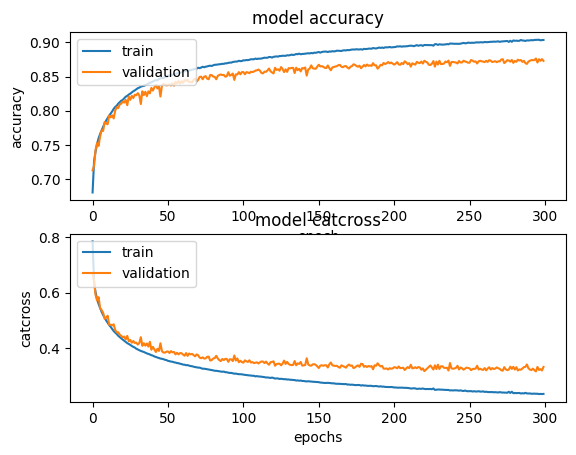

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(history.history['categorical_crossentropy'])
ax2.plot(history.history['val_categorical_crossentropy'])
ax2.set_title('model catcross')
ax2.set_xlabel('epochs')
ax2.set_ylabel('catcross')
ax2.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('saved_models')